<a href="https://colab.research.google.com/github/mvillanueva00/CFRx/blob/main/Ice_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

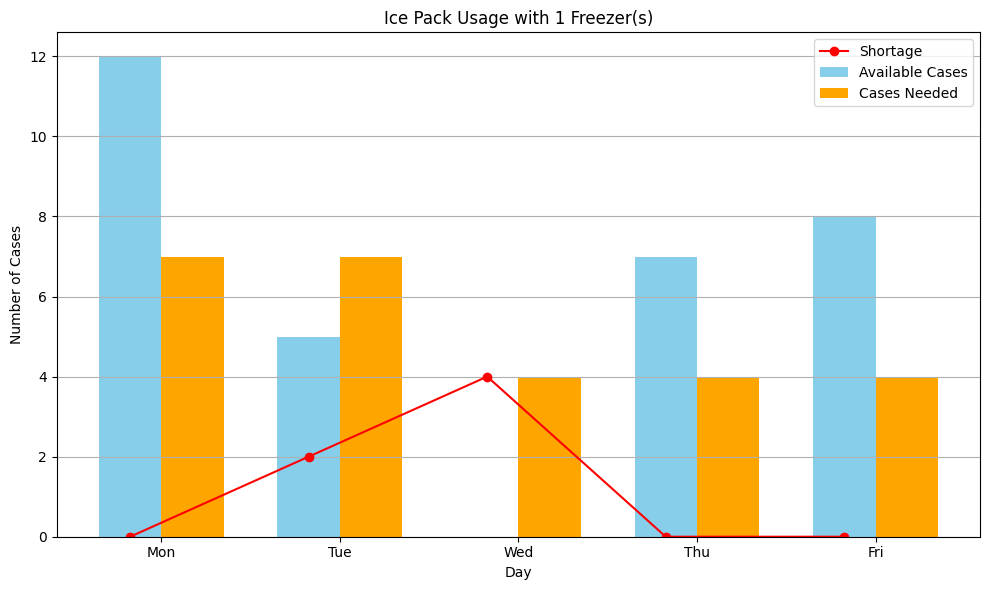

Daily Shortage: [0, 2, 4, 0, 0]
⚠️ Add 1 more freezer(s) to avoid running out of ice.


In [4]:
import matplotlib.pyplot as plt

# Function to simulate and visualize freezer performance
def simulate_and_plot(freezers, usage_list, freeze_time=3, cases_per_freezer=12):
    days = ["Mon", "Tue", "Wed", "Thu", "Fri"]
    total_cases = freezers * cases_per_freezer
    freezer_stock = total_cases
    shortage = []
    daily_available = []

    # Track when frozen cases return
    availability_tracker = {day: 0 for day in days + ["Next Mon", "Next Tue", "Next Wed"]}

    for i, usage in enumerate(usage_list):
        day = days[i]
        # Re-add frozen cases that are ready today
        thawed_today = availability_tracker[day]
        freezer_stock += thawed_today

        daily_available.append(freezer_stock)

        if usage <= freezer_stock:
            freezer_stock -= usage
            shortage.append(0)
            # Add today's usage to refreeze schedule
            thaw_day_index = i + freeze_time
            thaw_day = days[thaw_day_index] if thaw_day_index < len(days) else "Next " + days[thaw_day_index - len(days)]
            availability_tracker[thaw_day] += usage
        else:
            shortage.append(usage - freezer_stock)
            thaw_day_index = i + freeze_time
            thaw_day = days[thaw_day_index] if thaw_day_index < len(days) else "Next " + days[thaw_day_index - len(days)]
            availability_tracker[thaw_day] += freezer_stock
            freezer_stock = 0

    total_shortage = sum(shortage)
    extra_freezers_needed = ((total_shortage + cases_per_freezer - 1) // cases_per_freezer) if total_shortage > 0 else 0

    # Plotting
    x = range(len(days))
    bar_width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x, daily_available, width=bar_width, label='Available Cases', color='skyblue')
    plt.bar([p + bar_width for p in x], usage_list, width=bar_width, label='Cases Needed', color='orange')
    plt.plot(x, shortage, color='red', marker='o', label='Shortage')

    plt.xlabel('Day')
    plt.ylabel('Number of Cases')
    plt.title(f'Ice Pack Usage with {freezers} Freezer(s)')
    plt.xticks([p + bar_width / 2 for p in x], days)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print("Daily Shortage:", shortage)
    if extra_freezers_needed > 0:
        print(f"⚠️ Add {extra_freezers_needed} more freezer(s) to avoid running out of ice.")
    else:
        print("✅ Current number of freezers is sufficient.")

# 🔽 Change these inputs
freezers = 1
usage_list = [7, 7, 4, 4, 4]  # Example: Mon–Fri usage

simulate_and_plot(freezers, usage_list)
